# **EDA**

## Business Objectives
Analysis raw data to find interesting business metrics. 

## Data Mining Goals
Prepare data to generate visualization.

---

## **Prepare Environment**

<br/>

### Imports

In [148]:
# data analysis and data wrangling
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Other
from IPython.display import Image
import configparser
import subprocess
import warnings
import pprint
import time
import os

<br/>

### Prepare Principal Directory

In [149]:
def path_to_work(end_directory: str='notebooks'):
    curr_dir = os.path.dirname(os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return f'Change directory to: {curr_dir}'
    
    return f'Current working directory: {curr_dir}'

In [150]:
path_to_work('notebooks')

'Current working directory: /home/campos/projects/challenge-indicium'

<br/>

### Set Config

In [151]:
# Visualization inside the jupyter
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# formata os dados de todas as tabelas (ponto flutuante com 2 casas)
pd.options.display.float_format = '{:.2f}'.format

# parametros de config
rc={'savefig.dpi': 75, 
    'figure.autolayout': False, 
    'figure.figsize': [15, 8], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 18, 
    'lines.linewidth': 2.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 16,
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# Definition color and map de colors
default_color = '#56B4E9'
colormap = plt.cm.cool

# Single colour palettes for good and bad outcomes
good_palette = ['#44cc44']
bad_palette = ['#cc4444']
# Colour palette for gender - traditional light pink (female), light blue (male)
gender_palette = ['#B0C4DE','#FFB6C1']
# Colour palette for ticket class - gold (first), silver (second), bronze (third)
class_palette = ['#FFD700','#C0C0C0','#CD7F32']

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# graph style
sns.set(style='dark',rc=rc)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

## **Data Understanding**
### Collect Initial Data
The data set to be explored is was made available by a company of Florianópolis.

### File Descriptions
- `companies.csv` - companies information
- `contacts.csv` - emploeyrs contacts
- `deals.csv` - deals informations
- `sectors.csv` - dict of type sectors

<br/>

### Load data

In [152]:
%%time

deals = pd.read_csv('data/raw/deals.tsv', 
                    sep='\t',
                    encoding='utf-8')
sectors = pd.read_csv('data/raw/sectors.tsv', 
                      sep='\t', 
                      encoding='utf-8')
companies = pd.read_csv('data/raw/companies.tsv',
                        sep='\t',
                        encoding='utf-8')
contacts = pd.read_csv('data/raw/contacts.tsv',
                       sep='\t',
                       encoding='utf-8')

CPU times: user 7.68 ms, sys: 645 µs, total: 8.32 ms
Wall time: 7.48 ms


<br/>

### **Describe Data**

In [153]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dealsId           100 non-null    int64 
 1   dealsDateCreated  100 non-null    object
 2   dealsPrice        100 non-null    int64 
 3   contactsId        100 non-null    int64 
 4   companiesId       100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [154]:
sectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sectorKey  6 non-null      int64 
 1   sector     6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [155]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   companiesId           74 non-null     int64 
 1   companiesName         74 non-null     object
 2   companiesDateCreated  74 non-null     object
 3   createdBy             74 non-null     object
 4   companiesEmails       74 non-null     object
 5   companiesPhones       74 non-null     object
 6   employeesId           74 non-null     int64 
 7   employeesName         74 non-null     object
 8   usersResponsible      74 non-null     object
 9   sectorKey             74 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 5.9+ KB


In [156]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0    contactsId            74 non-null     int64 
 1   contactsName           74 non-null     object
 2   contactsDateCreated    74 non-null     object
 3   contactsCreatedBy      74 non-null     object
 4   contactsEmails         74 non-null     object
 5   contactsPhones         74 non-null     object
 6   contactsEmployers      74 non-null     object
 7   employersId            74 non-null     int64 
 8   contactsHomeAdress     74 non-null     object
 9   contactsLatLong        74 non-null     object
 10  contactsRelatedToLead  74 non-null     int64 
 11  contactsResponsible    74 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.1+ KB


---

## **Data Preparation: Cleaning**

**NOTES**
- There is a blank space in the metadata of the first column of the _contacts_ table

In [157]:
contacts.columns = ['contactsId',
                    'contactsName',
                    'contactsDateCreated',
                    'contactsCreatedBy',
                    'contactsEmails',
                    'contactsPhones',
                    'contactsEmployers',
                    'employersId', 
                    'contactsHomeAdress',
                    'contactsLatLong',
                    'contactsRelatedToLead',
                    'contactsResponsible']
print(contacts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   contactsId             74 non-null     int64 
 1   contactsName           74 non-null     object
 2   contactsDateCreated    74 non-null     object
 3   contactsCreatedBy      74 non-null     object
 4   contactsEmails         74 non-null     object
 5   contactsPhones         74 non-null     object
 6   contactsEmployers      74 non-null     object
 7   employersId            74 non-null     int64 
 8   contactsHomeAdress     74 non-null     object
 9   contactsLatLong        74 non-null     object
 10  contactsRelatedToLead  74 non-null     int64 
 11  contactsResponsible    74 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.1+ KB
None


<br/>

### Convert Types

In [158]:
deals['dealsDateCreated'] = pd.to_datetime(deals['dealsDateCreated'])
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dealsId           100 non-null    int64         
 1   dealsDateCreated  100 non-null    datetime64[ns]
 2   dealsPrice        100 non-null    int64         
 3   contactsId        100 non-null    int64         
 4   companiesId       100 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 4.0 KB


In [159]:
contacts['contactsDateCreated'] = pd.to_datetime(contacts['contactsDateCreated'])
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   contactsId             74 non-null     int64         
 1   contactsName           74 non-null     object        
 2   contactsDateCreated    74 non-null     datetime64[ns]
 3   contactsCreatedBy      74 non-null     object        
 4   contactsEmails         74 non-null     object        
 5   contactsPhones         74 non-null     object        
 6   contactsEmployers      74 non-null     object        
 7   employersId            74 non-null     int64         
 8   contactsHomeAdress     74 non-null     object        
 9   contactsLatLong        74 non-null     object        
 10  contactsRelatedToLead  74 non-null     int64         
 11  contactsResponsible    74 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 7.1+ KB


In [160]:
companies['companiesDateCreated'] = pd.to_datetime(companies['companiesDateCreated'])
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   companiesId           74 non-null     int64         
 1   companiesName         74 non-null     object        
 2   companiesDateCreated  74 non-null     datetime64[ns]
 3   createdBy             74 non-null     object        
 4   companiesEmails       74 non-null     object        
 5   companiesPhones       74 non-null     object        
 6   employeesId           74 non-null     int64         
 7   employeesName         74 non-null     object        
 8   usersResponsible      74 non-null     object        
 9   sectorKey             74 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 5.9+ KB


<br/>

### Invalid Values
There cannot be _dealsDateCreated, contactsDateCreated and companiesDateCreated_ in the future date. So, based on the date I received in '2018-10-09', after this date will are remove.

In [161]:
deals_clean = deals[deals.dealsDateCreated < "2018-10-09"]
print(f'Number rows deleted in deals: {len(deals) - len(deals_clean)}')

contacts_clean = contacts[contacts.contactsDateCreated < "2018-10-09"]
print(f'Number rows deleted in contacts: {len(contacts) - len(contacts_clean)}')

companies_clean = companies[companies.companiesDateCreated < "2018-10-09"]
print(f'Number rows deleted in companies: {len(companies) - len(companies_clean)}')

Number rows deleted in deals: 45
Number rows deleted in contacts: 26
Number rows deleted in companies: 26


---

## **Data Understanding: Joins and Metrics**

### **Metric: number of sales per contact and total amount sold per month.**

### Join tabels between  _deals_ and _contacts_

In [162]:
colunas_necessarias_contacts = ['contactsId','contactsName']
deals_contacts = pd.merge(deals_clean,
                          contacts_clean[colunas_necessarias_contacts],
                          left_on='contactsId', right_on='contactsId')
display(deals_contacts)

,dealsId,dealsDateCreated,dealsPrice,contactsId,companiesId,contactsName
0,10,2018-09-08,8880,11,29,Craig Boyd
1,5,2017-11-20,5030,11,28,Craig Boyd
2,7,2017-09-02,600,11,11,Craig Boyd
3,42,2017-12-26,2560,11,11,Craig Boyd
4,18,2018-04-05,3930,30,30,Cooper Sandoval
5,24,2018-01-01,3480,15,19,Jonah Day
6,20,2017-10-09,2380,15,19,Jonah Day
7,16,2018-05-04,6330,15,19,Jonah Day
8,45,2018-02-17,8890,15,19,Jonah Day
9,33,2018-05-12,7130,15,19,Jonah Day


In [163]:
n_vendas_contato = deals_contacts\
    .groupby('contactsName')['dealsPrice']\
    .sum()\
    .sort_values(ascending=False)

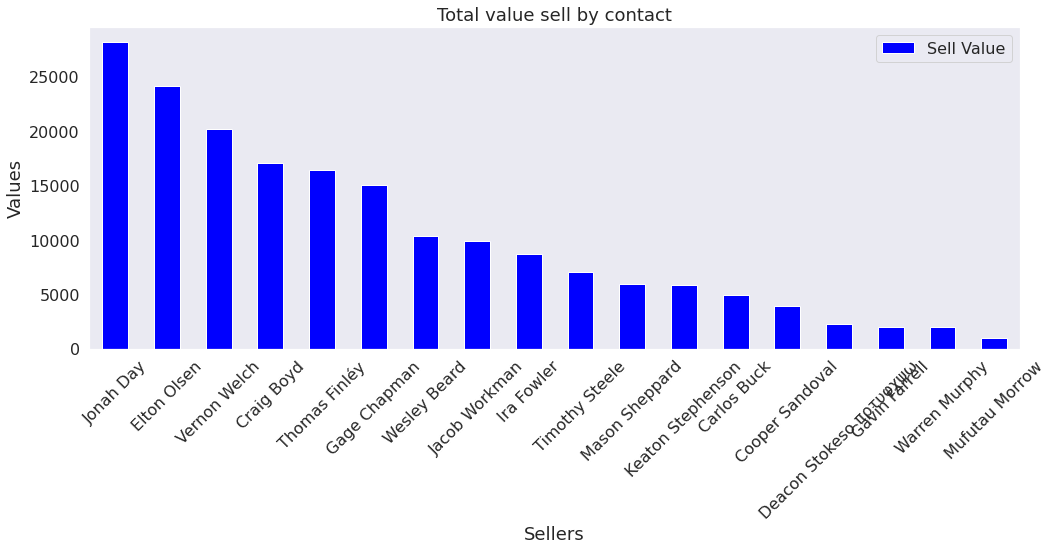

Output (valor_total_vendido_por_contato) saved.


In [164]:
n_vendas_contato = n_vendas_contato.plot(kind='bar',
                                         color='blue',
                                         label='Sell Value')
plt.xlabel('Sellers')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.title("Total value sell by contact")
plt.legend(loc="upper right")
plt.legend()
plt.tight_layout()
plt.show()

fig = n_vendas_contato.get_figure()
fig.savefig(f'reports/valor_total_vendido_por_contato.png', dpi=500)
print(f"Output (valor_total_vendido_por_contato) saved.")

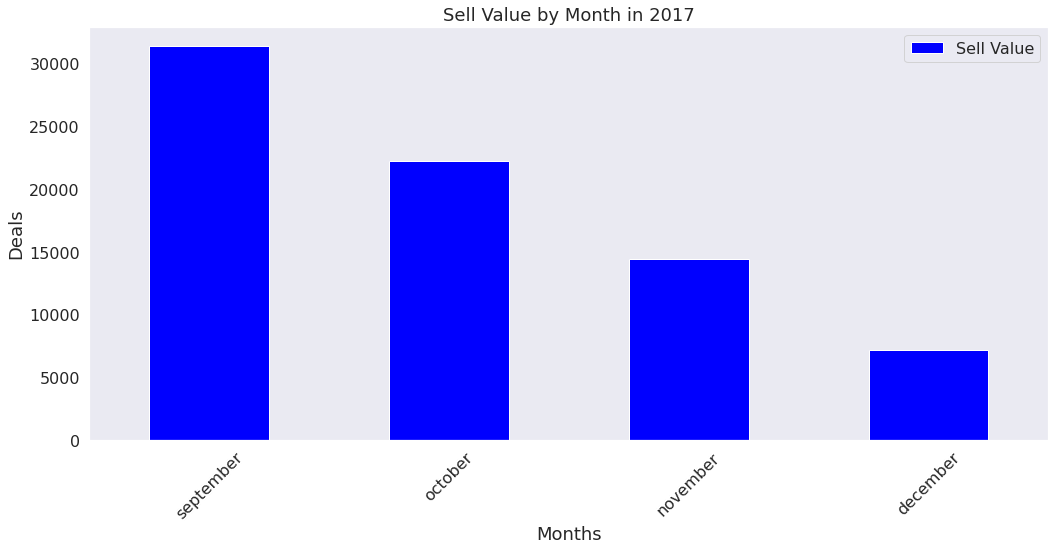

Output (Valor_total_vendido_por_mês-2017) saved.


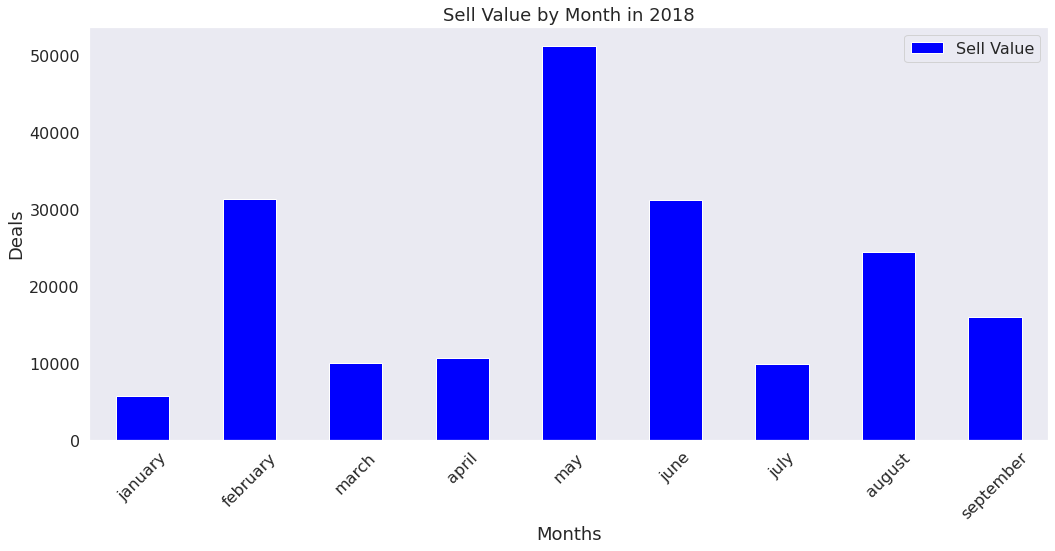

Output (Valor_total_vendido_por_mês-2018) saved.


In [165]:
for year in range(2017,2019): 
    query_year = deals_clean[(deals_clean['dealsDateCreated'].dt.year==year)]
    get_month = pd.DatetimeIndex(query_year['dealsDateCreated']).month
    n_vendas_mes = query_year.groupby(get_month)['dealsPrice'].sum()
    
    n_vendas_mes = n_vendas_mes.rename(index={1:"january",
                                              2:"february",
                                              3:"march",
                                              4:"april",
                                              5:"may",
                                              6:"june",
                                              7:"july",
                                              8:"august",
                                              9:"september",
                                              10:"october",
                                              11:"november",
                                              12:"december"})

    n_vendas_mes_grafico = n_vendas_mes.plot(kind='bar',
                                             color='blue',
                                             label='Sell Value')
    plt.xlabel('Months')
    plt.ylabel('Deals')
    plt.xticks(rotation=45)
    plt.title(f"Sell Value by Month in {year}")
    plt.legend(loc="upper right")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    fig = n_vendas_mes_grafico.get_figure()
    fig.savefig(f'reports/valor_total_vendido_por_mês-{year}.png', dpi=500)
    print(f"Output (Valor_total_vendido_por_mês-{year}) saved.")

---

### **Metric: List of sales by sector ordered by month**

In [166]:
# O join to map the name of sectors
colunas_necessarias_companies = ['companiesId', 'sectorKey' ]
companies_sectors = pd.merge(companies_clean[colunas_necessarias_companies], sectors,
                             left_on='sectorKey', right_on='sectorKey')

# join between deals and companies_sectors
deals_companies_sectors = pd.merge(deals_clean, companies_sectors,
                                   left_on='companiesId', right_on='companiesId')

# keep sorted by date
display(deals_companies_sectors.sort_values(by=['dealsDateCreated'], ascending=False))

,dealsId,dealsDateCreated,dealsPrice,contactsId,companiesId,sectorKey,sector
30,80,2018-09-16,740,55,55,4,Indústria
0,10,2018-09-08,8880,11,29,4,Indústria
13,11,2018-09-08,1450,13,13,2,Serviços
14,68,2018-09-05,4960,23,23,3,Tecnologia
11,44,2018-08-15,5930,63,63,2,Serviços
12,55,2018-08-11,8880,13,13,2,Serviços
22,83,2018-06-26,9590,3,3,6,Atacado
29,63,2018-06-20,9650,45,45,2,Serviços
15,86,2018-06-13,7010,35,35,2,Serviços
23,34,2018-05-13,6840,3,3,6,Atacado


**NOTE**
<br/>
It remained to analyze the algorithmic complexity. Each `for` makes the complexity increase exponentially.

In [167]:
table_result = pd.DataFrame(columns=['Year','Month', 'Sector', 'Total Amount Sold Monthly'])
table_result

,Year,Month,Sector,Total Amount Sold Monthly


In [168]:
table_result.Year = table_result.Year.astype(int)
table_result.Sector = table_result.Month.astype(int)
table_result.Setor = table_result.Sector.astype(int)
table_result['Total Amount Sold Monthly'] = table_result['Total Amount Sold Monthly'].astype(int)

for year in range(2017,2019): 
    query_year = deals_companies_sectors[(deals_companies_sectors['dealsDateCreated'].dt.year==year)]

    for mes in range(1,13):
        query_year_month = query_year[(query_year['dealsDateCreated'].dt.month==mes)]        
        
        # percorre setor (é menos custoso comparar valores numéricos, então query_year_month['sectorKey'])
        for setor in query_year_month['sectorKey']:
            query_sector_month = query_year_month[(query_year_month['sectorKey']==setor)]
                            
            grouping = query_sector_month\
                                        .groupby('sector')['dealsPrice']\
                                            .sum()\
                                                .sort_values(ascending=False)

            data = pd.DataFrame([[year,
                                  mes,
                                  setor,
                                  grouping[0]]], 
                                columns=['Year',
                                         'Month',
                                         'Sector',
                                         'Total Amount Sold Monthly'])
            table_result = table_result.append(data)
            
            table_result = table_result.drop_duplicates(keep='first')
            
table_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 0
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       28 non-null     int64 
 1   Month                      28 non-null     object
 2   Sector                     28 non-null     int64 
 3   Total Amount Sold Monthly  28 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


<br/>

### Map and Sort

In [169]:
dict_setor = {1:"Bens de Consumo",
              2:"Serviços",
              3:"Tecnologia",
              4:"Indústria",
              5:"Varejo",
              6:"Atacado"}
table_result['Setor'] = table_result['Sector'].map(dict_setor)

table_result = table_result.sort_values(by=['Year',
                                            'Month',
                                            'Total Amount Sold Monthly',
                                            'Sector'],
                                        ascending=False)

In [170]:
display(table_result)

,Year,Month,Sector,Total Amount Sold Monthly,Setor
0,2018,9,4,9620,Indústria
0,2018,9,3,4960,Tecnologia
0,2018,9,2,1450,Serviços
0,2018,8,2,14810,Serviços
0,2018,6,2,16660,Serviços
0,2018,6,6,9590,Atacado
0,2018,5,4,13460,Indústria
0,2018,5,5,8680,Varejo
0,2018,5,6,6840,Atacado
0,2018,4,3,3930,Tecnologia


---

## **Save Clean Data**

In [171]:
def save_data_clenning(df: pd.core.frame.DataFrame,
                       path: str = 'data/cleansing/') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return "saved data!"

In [172]:
save_data_clenning(df = table_result,
                   path = 'data/cleansing/output.csv')

'saved data!'

---

This work by Bruno A. R. M. Campos is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.